In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Differential-Equations

We searcj for the solutoon of a initial value problem

$$y' = f(x,y), y(x_0) = y_0$$

on an interval $I = [x_0, \bar{x}]$

## Simple Numerical Method (Euler Method)

Goal is to approximate the solution going along tangent lines. We get the recursion

$$y_n = y_{n-1} + hf(x_{n-1},y_{n-1})$$

As an example we consider the differential equation

$$y'(t) = 2(1-y) -e^{-4t}$$

with the analytical solution $y = \frac{1}{2e^{4t}} + 1 - \frac{1}{2e^{2t}}$



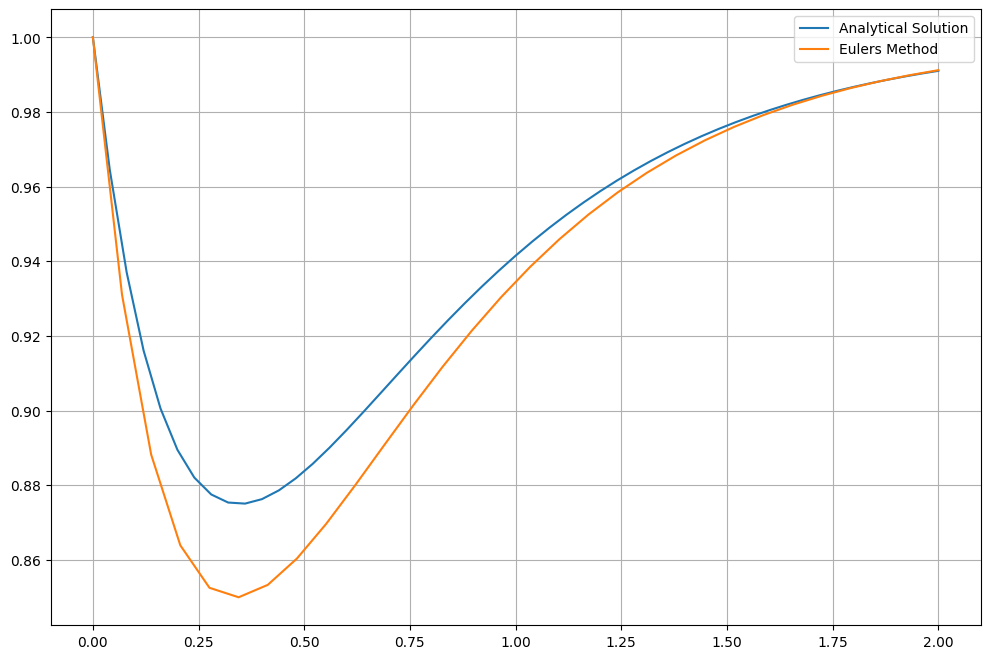

In [19]:
y_0=1
def f(y,t):
    return 2*(1-y) -np.exp(-4*t)

def eulers_method(f,y_0,t):
    y = np.zeros(len(t)) # Initialize solution
    y[0] = y_0

    for i in range(0,len(t)-1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + f(y[i],t[i]) * h
    return y

points = 30
t = np.linspace(0,2,points)

t_ana = np.linspace(0,2,51)
y_ana = 1/(2*np.exp(4*t_ana)) + 1 - 1/(2*np.exp(2*t_ana))

plt.figure(figsize=(12,8))
plt.plot(t_ana,y_ana, label="Analytical Solution")
plt.plot(t,eulers_method(f,y_0,t), label="Eulers Method")
plt.legend()
plt.grid(True)
plt.show()


## Explizite Runge-Kutta Methoden

Runge-Kutta methods are implicit and explicit iterative methods which by using temporal discretization the solutions of nonlinear equations can be approximated

$$y_{n+1} = y_n + h \sum_{i=1}^s b_i k_i$$

where:

+ $k_1 = f(t_n,y_n)$
+ $k_2 = f(t_n + c_2 h, y_n + (a_{21}k_1) h)$
+ $k_3 = f(t_n + c_3h, y_n + (a_{31}k_1 + a_{32} k_2)h )$
+ ...
+ $k_s = f(t_n + c_sh, y_n + (a_{s1}k_1 + a_{s2}k_2 + ... + a_{s,s-1}k_{s-1})h)$

These methods can be summarized into a Butcher-Tableau where matrix $[a_{ij}]$ is the Runge-Kutta matrix, $b_i,c_i$ are the weights and nodes

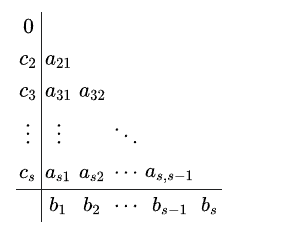

#### Implementation of RK-4 Method

The Runge-Kutta Method of fourth order is given by the stage equations:

+ $k_1 = f(t_n,y_n)$
+ $k_2 = f(t_n + h/2, y_n + hk_1 /2)$
+ $k_3 = f(t_n + h/2, y_n + hk_2/2)$
+ $k_4 = f(t_n + h, y_n + hk_3)$

In total $y_{n+1} = y_n + h(1/6k_1 + 1/3 k_2 + 1/3 k_3 + 1/6 k_4$)

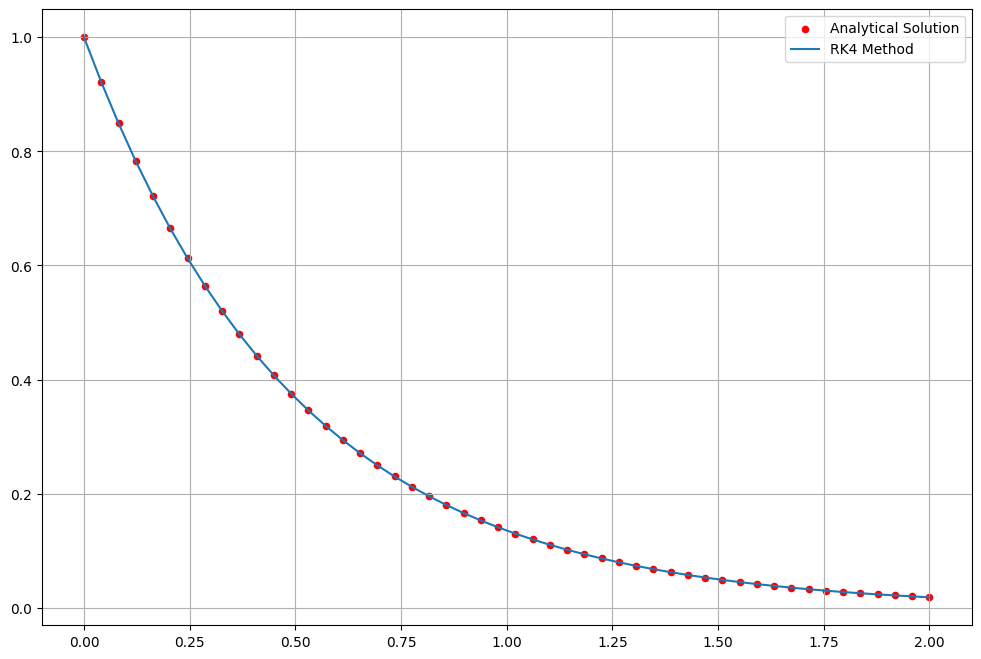

In [ ]:


def RK4(f, y_0, t):
    y = np.zeros(len(t))
    y[0] = y_0  # Initialize first element
    
    for i in range(0, len(t)-1):
        h = t[i+1] - t[i]
        
        # Initialize RK-Stagesb n
        K1 = f(t[i], y[i])
        K2 = f(t[i] + h/2, y[i] + h*K1/2)
        K3 = f(t[i] + h/2, y[i] + h*K2/2) 
        K4 = f(t[i] + h, y[i] + h*K3)
        
        y[i+1] = y[i] + h*(K1 + 2*K2 + 2*K3 + K4)/6
    
    return y

# Example usage with a test ODE
def f(t, y):
    return -2 * y  # Example: dy/dt = -2y

# Test parameters
t = np.linspace(0, 2, 50)
y_0 = 1

# Analytical solution for dy/dt = -2y, y(0) = 1
t_ana = t
y_ana = np.exp(-2 * t)

plt.figure(figsize=(12,8))
plt.scatter(t_ana, y_ana, color="red", label="Analytical Solution", s=20)
plt.plot(t, RK4(f, y_0, t), label="RK4 Method")
plt.legend()
plt.grid(True)
plt.show()

### Implementation of different Explicit Runge-Kutta Methods


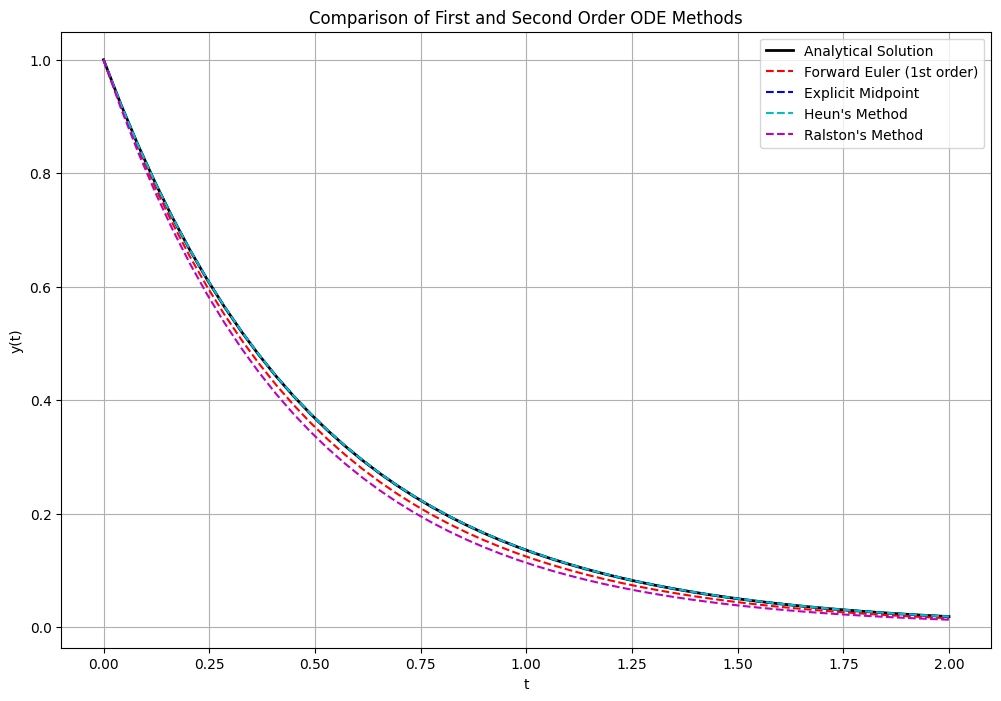

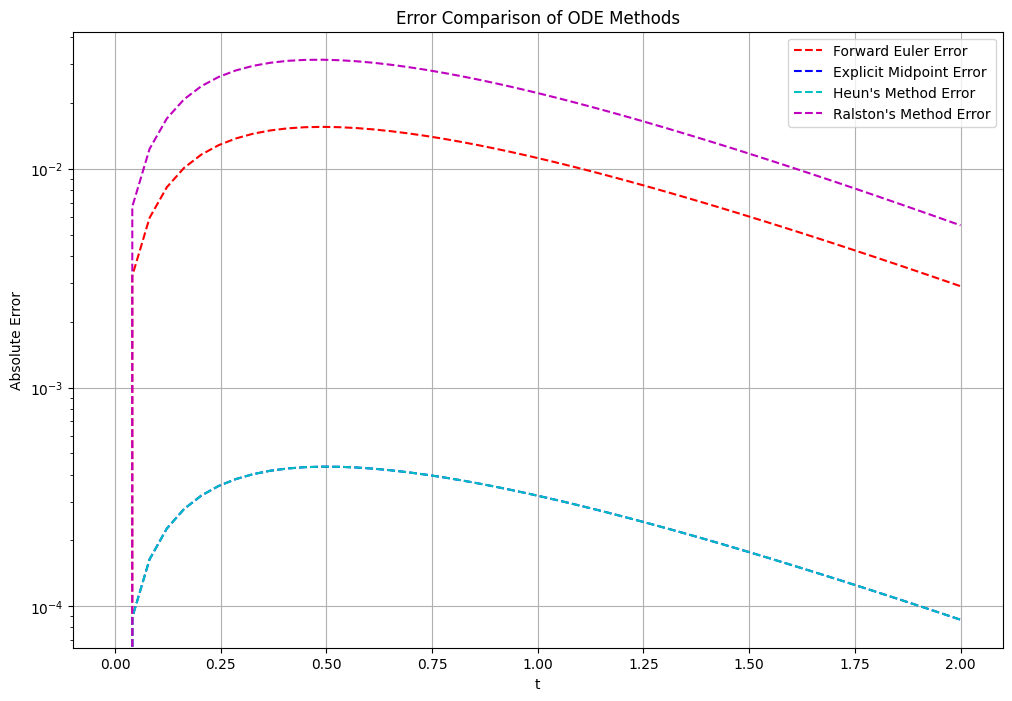

In [32]:
def forward_euler(f,y_0,t):
    """ 
    Forward Euler Method (1st Order)
    
    0 | 0
    -----
      | 1
    """
    y = np.zeros(len(t))
    y[0] = y_0

    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h*f(t[i], y[i])
    
    return y


def explicit_midpoint(f,y_0,t):
    """ 
    Explicit Midpoint Rule

    0 | 0    0
    1/2 | 1/2  0 
    --------------
        |  0  1
    """
    y = np.zeros(len(t))
    y[0] = y_0

    for i in range(len(t) - 1):
        h = t[i+1] - t[i]

        k1 = f(t[i],y[i])
        k2 = f(t[i] + h/2, y[i] + (h/2) * k1)

        y[i+1] = y[i] + h * k2

    return y

def heuns_method(f,y_0,t):
    """ 
    Heuns Method

    0 |  0    0 
    1 |  1    0
    ------------
      | 1/2  1/2
    """
    y = np.zeros(len(t))
    y[0] = y_0

    for i in range(len(t) - 1):
        h = t[i+1] - t[i]

        k1 = f(t[i],y[i])
        k2 = f(t[i] + h, y[i] + h*k1)

        y[i+1] = y[i] + (h/2) * (k1 + k2)

    return y

def ralston_methon(f,y_0,t):
    """ 
    Implementation of Ralston's Method

    0   | 0    0
    2/3 | 2/3  0
    ------------
        | 1/4  3/4
    """
    y = np.zeros(len(t))
    y[0] = y_0

    for i in range(len(t)-1):
        h = t[i+1] - t[i]

        k1 = f(t[i], y[i])
        k2 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k1)

        y[i+1] = y[i] + h*(k1/3 + (3/4)*k2)

    return y

def test_ode(t,y):
    return -2 * y

def analytical_solution(t,y0):
    return y0 * np.exp(-2 * t)

t = np.linspace(0,2,50)
y0 = 1

y_ana = analytical_solution(t,y0)
y_euler = forward_euler(test_ode,y0,t)
y_midpoint = explicit_midpoint(test_ode,y0,t)
y_heun = heuns_method(test_ode,y0,t)
y_ralston = ralston_methon(test_ode,y_0,t)

# Plot results
plt.figure(figsize=(12, 8))

plt.plot(t, y_ana, 'k-', linewidth=2, label='Analytical Solution')
plt.plot(t, y_euler, 'r--', label='Forward Euler (1st order)')
plt.plot(t, y_midpoint, 'b--', label='Explicit Midpoint')
plt.plot(t, y_heun, 'c--', label="Heun's Method")
plt.plot(t, y_ralston, 'm--', label="Ralston's Method")

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of First and Second Order ODE Methods')
plt.legend()
plt.grid(True)
plt.show()

# Error comparison
plt.figure(figsize=(12, 8))

plt.semilogy(t, np.abs(y_euler - y_ana), 'r--', label='Forward Euler Error')
plt.semilogy(t, np.abs(y_midpoint - y_ana), 'b--', label='Explicit Midpoint Error')
plt.semilogy(t, np.abs(y_heun - y_ana), 'c--', label="Heun's Method Error")
plt.semilogy(t, np.abs(y_ralston - y_ana), 'm--', label="Ralston's Method Error")

plt.xlabel('t')
plt.ylabel('Absolute Error')
plt.title('Error Comparison of ODE Methods')
plt.legend()
plt.grid(True)
plt.show()
    

### Embedded Runge-Kutta Methods

Goal here is to adaptively control the step size of a Runge-Kutta Method by calculating the local error of the method. For this two Explicit Methods are used as a combination

What we do is to calculate both the numerical solution $y_1, \hat{y}_1$ and the estimate:

$$est = || h \sum_{i=1}^s d_i Y_i' || = || \hat{y}_1 - y_1 ||$$

+ If $est \leq tol$ then the step gets accepted:
+ $x_0 := x_0 + h$
+ $y_0 = y_1$
+ $h:= min(h_opt, \bar{x}-x_0)$
+ Else the step gets canceled and we set h=h_opt

With this method we want to the solve the Van der Pol'sche equation

$$y'' - \lambda (1- y^2)y' + y = 0, y(0) = 2 ,y'(0) = 0$$


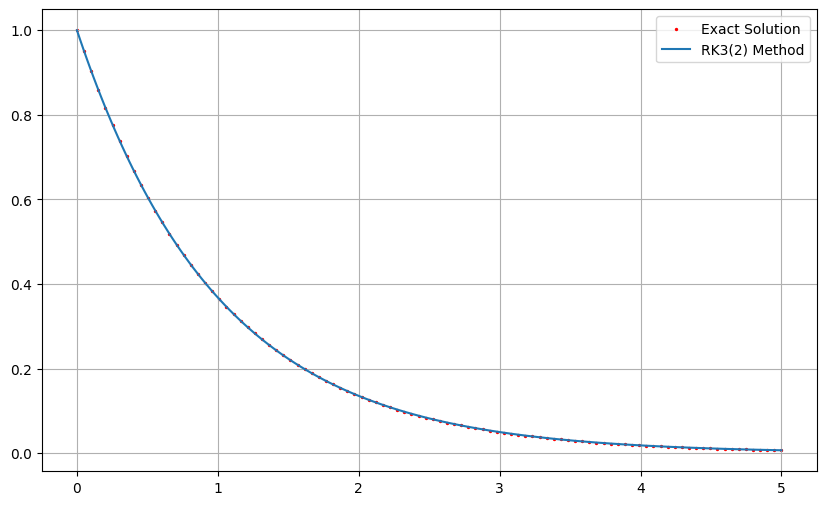

In [38]:
def rk_adaptive_32(f, t_span, y0, tol=1e-6,h_min=1e-8,h_max=1):
    """ 
    Implementation of the adaptive Runge Kutta 3(2) method

    0    | 
    1/3  | 1/3
    2/3  |  0   2/3
    ------------------
         | 1/4   0  3/4    b_i
         | 0    1/2   1/2   b_i_hat
         | -1/4  1/2  -1/4  d_i
    """
    t0, tf = t_span
    t = t0
    y = y0.copy()

    # Initialize Butcher Tableau
    c = np.array([0, 1/3, 2/3])
    a = np.array([
        [0, 0, 0],
        [1/3, 0, 0],
        [0,  2/3, 0]
    ])
    b_i = np.array([1/4, 0, 3/4])
    b_i_hat = np.array([0, 1/2, 1/2])

    # Safe the results of the calculation
    t_list = [t]
    y_list = [y.copy()]

    # Initialize Step size
    h = min(h_max, (tf - t0)/10)

    while t < tf:
        if t + h > tf:
            h = tf - t 

        # Calculate the steps
        k1 = f(t,y)
        k2 = f(t + c[1]*h, y + h*a[1,0]*k1)
        k3 = f(t + c[2]*h, y + h*(a[2,0]*k1 + a[2,1]*k2))

        # Calculate both one-step methods
        y_i = y + h * (b_i[0] * k1 + b_i[1] * k2 + b_i[2] * k3)
        y_i_hat = y + h*(b_i_hat[0] * k1 + b_i_hat[1] * k2 + b_i_hat[2] * k3)

        # Estimate error
        error = np.linalg.norm(y_i - y_i_hat)
        
        # Control Step size
        if error <= tol or h <= h_min:
            # Step is accepted
            y = y_i
            t = t + h
            t_list.append(t)
            y_list.append(y.copy())

            h_opt = 0.9 * h * (tol/error)**(1/3)
            h = min(h_opt, h_max)

        else:
            h_opt = 0.9 * h * (tol/error)**(1/3)
            h = min(h_opt,h_max)

    return np.array(t_list), np.array(y_list)

def test_ode(t,y):
    return -y

t_span = (0,5)
y0 = np.array([1.0])

t_num,y_num = rk_adaptive_32(test_ode,t_span, y0,tol=1e-6)
t_exact = np.linspace(0,5,100)
y_exact = np.exp(-t_exact)

plt.figure(figsize=(10,6))
plt.scatter(t_exact,y_exact, label="Exact Solution",s=2,color="red")
plt.plot(t_num,y_num, label="RK3(2) Method")
plt.legend()
plt.grid(True)
plt.show()


Now we solve the Van-Pol equations using these adaptive methods

Solving equation for lamda = 0
Number of steps: 2672
Minimal Step size: 1.55e-02
Maximal Step size: 1.00e-01
Solving equation for lamda = 12
Number of steps: 3484
Minimal Step size: 3.94e-04
Maximal Step size: 1.00e-01


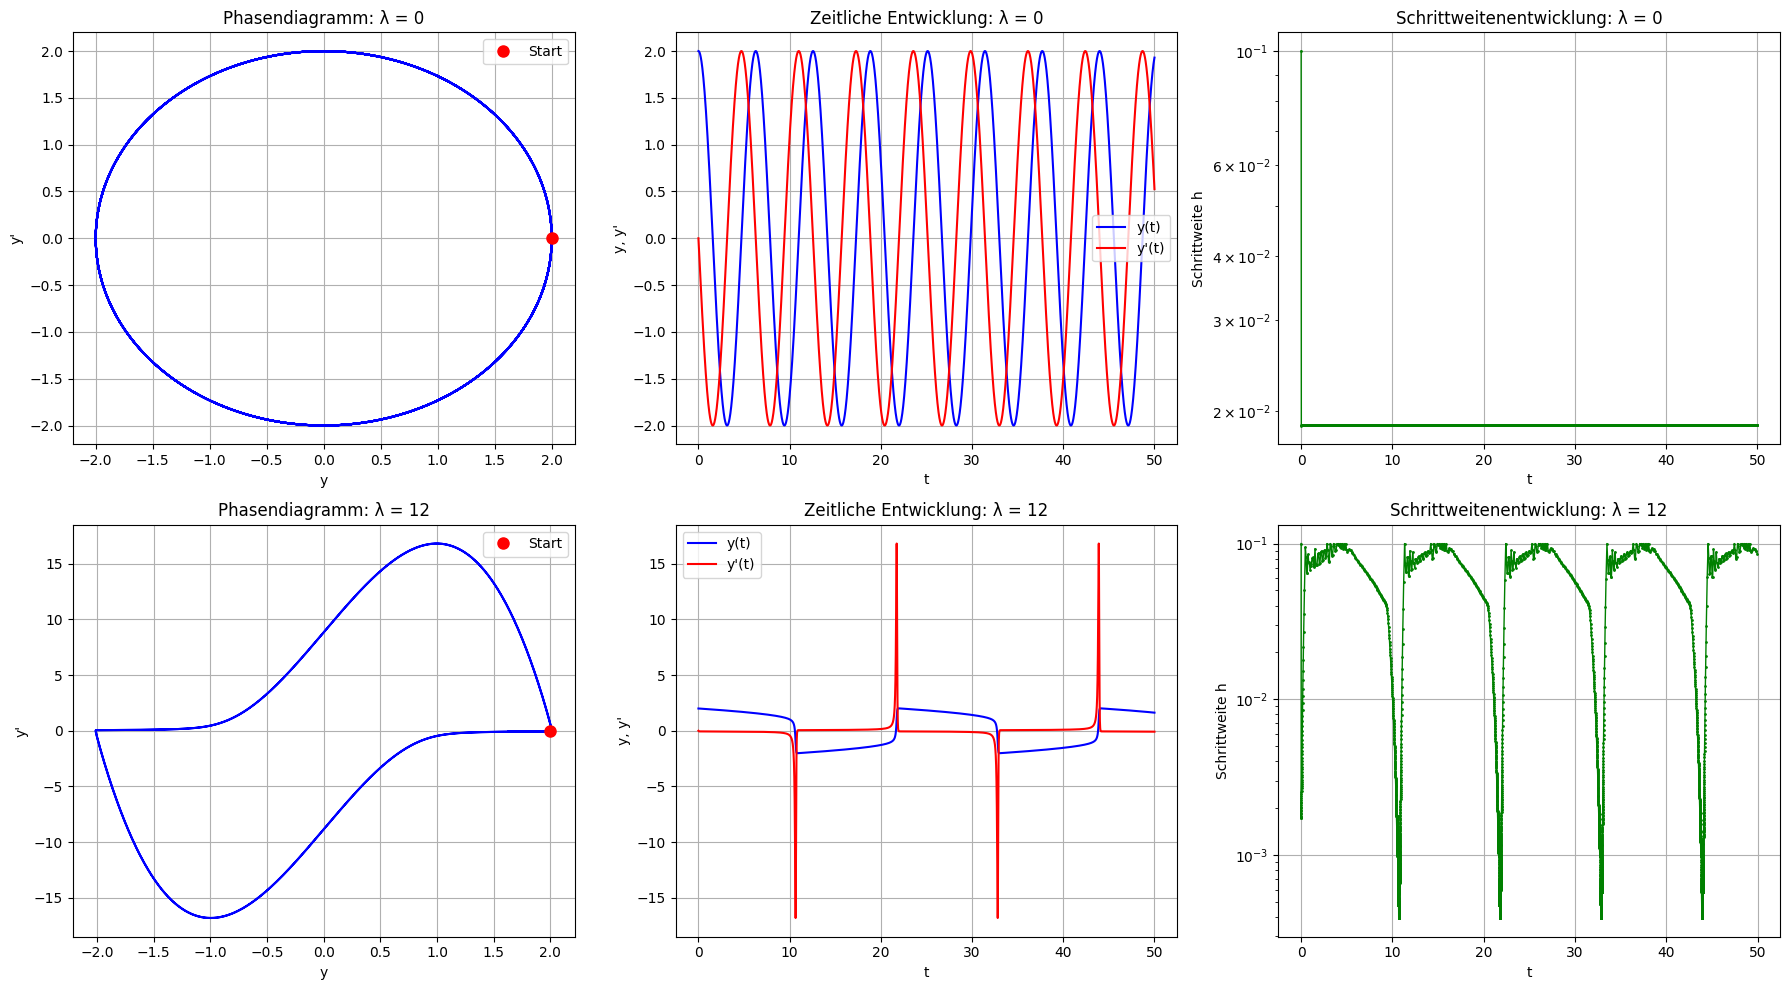

In [41]:
def rk_adaptive_32(f, t_span, y0, tol=1e-6,h_min=1e-8,h_max=1):
    """ 
    Implementation of the adaptive Runge Kutta 3(2) method

    0    | 
    1/3  | 1/3
    2/3  |  0   2/3
    ------------------
         | 1/4   0  3/4    b_i
         | 0    1/2   1/2   b_i_hat
         | -1/4  1/2  -1/4  d_i
    """
    t0, tf = t_span
    t = t0
    y = y0.copy()

    # Initialize Butcher Tableau
    c = np.array([0, 1/3, 2/3])
    a = np.array([
        [0, 0, 0],
        [1/3, 0, 0],
        [0,  2/3, 0]
    ])
    b_i = np.array([1/4, 0, 3/4])
    b_i_hat = np.array([0, 1/2, 1/2])

    # Safe the results of the calculation
    t_list = [t]
    y_list = [y.copy()]

    # Initialize Step size
    h = min(h_max, (tf - t0)/10)
    h_list = [h]

    while t < tf:
        if t + h > tf:
            h = tf - t 

        # Calculate the steps
        k1 = f(t,y)
        k2 = f(t + c[1]*h, y + h*a[1,0]*k1)
        k3 = f(t + c[2]*h, y + h*(a[2,0]*k1 + a[2,1]*k2))

        # Calculate both one-step methods
        y_i = y + h * (b_i[0] * k1 + b_i[1] * k2 + b_i[2] * k3)
        y_i_hat = y + h*(b_i_hat[0] * k1 + b_i_hat[1] * k2 + b_i_hat[2] * k3)

        # Estimate error
        error = np.linalg.norm(y_i - y_i_hat)
        
        # Control Step size
        if error <= tol or h <= h_min:
            # Step is accepted
            y = y_i
            t = t + h
            t_list.append(t)
            y_list.append(y.copy())
            h_list.append(h)
            h_opt = 0.9 * h * (tol/error)**(1/3)
            h = min(h_opt, h_max)

        else:
            h_opt = 0.9 * h * (tol/error)**(1/3)
            h = min(h_opt,h_max)

    return np.array(t_list), np.array(y_list), np.array(h_list)

def van_der_pol(t,y,lam):
    """ 
    Van-Pol differential equation
    y'' - lambda (1-y²)y' + y = 0, y(0) = 2, y'(0) = 0
    
    Make into first order equation
    y1 = y, y2 = y' 

    y1' = y2 
    y2' = lam(1-y1^2)y2 - y1
    """
    y1, y2 = y
    dydt = np.array([
        y2,
        lam * (1 - y1**2) * y2 - y1
    ])
    return dydt

# Solve van der Pol for different lambda values

def solve_van_der_pol():
    # Parameter
    t_span = (0,50)
    y0 = np.array([2.0, 0.0]) # y(0) = 2, y'(0) =0
    tol = 1e-6

    lambda_values = [0,12]

    fig,axes = plt.subplots(2,3, figsize=(18,10))

    for i,lam in enumerate(lambda_values):
        print(f'Solving equation for lamda = {lam}')

        # Define the equation
        def f_lam(t,y):
            return van_der_pol(t,y,lam)
        
        # Solve with adaptive method
        t,y,h = rk_adaptive_32(f_lam, t_span,y0,tol=tol,h_min=1e-8,h_max=0.1)

        print(f"Number of steps: {len(t)}")
        print(f"Minimal Step size: {np.min(h):.2e}")
        print(f"Maximal Step size: {np.max(h):.2e}")

                # Phasendiagramm
        axes[i, 0].plot(y[:, 0], y[:, 1], 'b-', linewidth=1.5)
        axes[i, 0].plot(y[0, 0], y[0, 1], 'ro', markersize=8, label='Start')
        axes[i, 0].set_xlabel('y')
        axes[i, 0].set_ylabel('y\'')
        axes[i, 0].set_title(f'Phasendiagramm: λ = {lam}')
        axes[i, 0].grid(True)
        axes[i, 0].legend()
        
        # Zeitliche Entwicklung
        axes[i, 1].plot(t, y[:, 0], 'b-', label='y(t)', linewidth=1.5)
        axes[i, 1].plot(t, y[:, 1], 'r-', label="y'(t)", linewidth=1.5)
        axes[i, 1].set_xlabel('t')
        axes[i, 1].set_ylabel('y, y\'')
        axes[i, 1].set_title(f'Zeitliche Entwicklung: λ = {lam}')
        axes[i, 1].grid(True)
        axes[i, 1].legend()
        
        # Schrittweitenentwicklung
        axes[i, 2].semilogy(t[:-1], h[:-1], 'g.-', markersize=2, linewidth=1)
        axes[i, 2].set_xlabel('t')
        axes[i, 2].set_ylabel('Schrittweite h')
        axes[i, 2].set_title(f'Schrittweitenentwicklung: λ = {lam}')
        axes[i, 2].grid(True)
    
    plt.tight_layout()
    plt.show()

solve_van_der_pol()


# Plotting the Stabiliy Function 

The Stability-Function of an explicit Runge-Kutta method is given by $R(z) = 1 + zb^T(I-zA)^{-1}1$

If the method was further accuracy $p$ we can calculate:

$$b^TA^l 1 = \frac{1}{(l+1)!}, 0 \leq l \leq p-1$$

In the case that $p=s$ this gives us the functional form

$$R(z) = 1 + z + \frac{z^2}{2} + ... + \frac{z^p}{p!}$$